In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
# import unet module
from tf_unet import image_gen
from tf_unet import unet
from img_provider import simple_data_provider
from tf_unet import util

In [3]:
generator_artificial = image_gen.GrayScaleDataProvider(572, 572, cnt=20, rectangles=True)
generator_reallife = simple_data_provider(x=572, y=572, nclass=3, channel='red', test=False)

(1, 572, 572, 1) (1, 572, 572, 3)


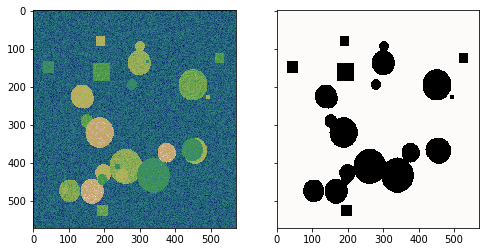

In [11]:
# test artificial generator
x_test, y_test = generator_artificial(1)
print(x_test.shape, y_test.shape)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,:, :,0], aspect="auto")
ax[1].imshow(y_test[0,:, :,0], aspect="auto")

In [12]:
net = unet.Unet(channels=generator_reallife.channels,
                n_class=generator_reallife.n_class,
                layers=4,
                features_root=16)

2019-01-17 11:25:03,491 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [13]:
trainer = unet.Trainer(net, optimizer="momentum", 
                       opt_kwargs=dict(momentum=0.2))

In [14]:
# pre-training
path_artificial = trainer.train(generator_artificial, "./unet_trained", 
                     training_iters=32, epochs=10, display_step=2)

2019-01-17 11:25:07,475 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'
2019-01-17 11:25:07,475 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'
2019-01-17 11:25:07,475 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'
2019-01-17 11:25:07,475 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'
2019-01-17 11:25:12,736 Verification error= 58.4%, loss= 1.0978
2019-01-17 11:25:15,987 Start optimization
2019-01-17 11:25:22,908 Iter 0, Minibatch Loss= 1.0193, Training Accuracy= 0.7515, Minibatch error= 24.8%
2019-01-17 11:25:23,926 Iter 2, Minibatch Loss= 0.9025, Training Accuracy= 0.7402, Minibatch error= 26.0%
2019-01-17 11:25:24,912 Iter 4, Minibatch Loss= 0.7067, Training Accuracy= 0.7928, Minibatch error= 20.7%
2019-01-17 11:25:25,932 Iter 6, Minibatch Loss= 0.7370, Training Accuracy= 0.7587, Minibatch error= 24.1%
2019-01-17 11:25:26,966 Iter 8, Minibatch Loss= 0.6344, Training Accuracy= 0.8043, Minibatch error= 19.6%
2019-01-17 11:2

2019-01-17 11:26:44,489 Iter 136, Minibatch Loss= 0.0784, Training Accuracy= 0.9821, Minibatch error= 1.8%
2019-01-17 11:26:45,540 Iter 138, Minibatch Loss= 0.3175, Training Accuracy= 0.9317, Minibatch error= 6.8%
2019-01-17 11:26:46,510 Iter 140, Minibatch Loss= 8.7131, Training Accuracy= 0.7905, Minibatch error= 21.0%
2019-01-17 11:26:47,517 Iter 142, Minibatch Loss= 0.9284, Training Accuracy= 0.1687, Minibatch error= 83.1%
2019-01-17 11:26:48,514 Iter 144, Minibatch Loss= 0.8380, Training Accuracy= 0.7811, Minibatch error= 21.9%
2019-01-17 11:26:49,546 Iter 146, Minibatch Loss= 0.7691, Training Accuracy= 0.7812, Minibatch error= 21.9%
2019-01-17 11:26:50,551 Iter 148, Minibatch Loss= 0.7051, Training Accuracy= 0.7877, Minibatch error= 21.2%
2019-01-17 11:26:51,553 Iter 150, Minibatch Loss= 0.6893, Training Accuracy= 0.7383, Minibatch error= 26.2%
2019-01-17 11:26:52,540 Iter 152, Minibatch Loss= 0.7190, Training Accuracy= 0.7663, Minibatch error= 23.4%
2019-01-17 11:26:53,511 Iter 1

2019-01-17 11:28:06,511 Iter 278, Minibatch Loss= 0.5678, Training Accuracy= 0.8402, Minibatch error= 16.0%
2019-01-17 11:28:07,495 Iter 280, Minibatch Loss= 0.5845, Training Accuracy= 0.8097, Minibatch error= 19.0%
2019-01-17 11:28:08,435 Iter 282, Minibatch Loss= 0.6337, Training Accuracy= 0.7816, Minibatch error= 21.8%
2019-01-17 11:28:09,406 Iter 284, Minibatch Loss= 0.6292, Training Accuracy= 0.7768, Minibatch error= 22.3%
2019-01-17 11:28:10,346 Iter 286, Minibatch Loss= 0.5905, Training Accuracy= 0.8073, Minibatch error= 19.3%
2019-01-17 11:28:10,724 Epoch 8, Average loss: 0.7884, learning rate: 0.1327
2019-01-17 11:28:11,386 Verification error= 20.3%, loss= 0.6159
2019-01-17 11:28:14,502 Iter 288, Minibatch Loss= 0.6546, Training Accuracy= 0.7567, Minibatch error= 24.3%
2019-01-17 11:28:15,457 Iter 290, Minibatch Loss= 0.6352, Training Accuracy= 0.7822, Minibatch error= 21.8%
2019-01-17 11:28:16,396 Iter 292, Minibatch Loss= 0.6039, Training Accuracy= 0.8024, Minibatch error= 1

In [4]:
net_real = unet.Unet(channels=generator_reallife.channels,
                     n_class=generator_reallife.n_class,
                     layers=4,
                     features_root=16)


2019-01-17 13:56:50,826 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [ ]:
trainer_real = unet.Trainer(net_real, optimizer="momentum", 
                       opt_kwargs=dict(momentum=0.2))
# train with reallife images
path_real = trainer_real.train(generator_reallife, "./unet_trained",
                          training_iters=32, epochs=200, display_step=8, restore=True)


2019-01-16 10:03:34,296 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [5]:
# test
# x_test = cv2.imread("D:\\ChangLiu\\MasterThesis\\Master-Thesis\\TestSet\\Origin_img\\00063.jpg")
# y_test = cv2.imread("D:\\ChangLiu\\MasterThesis\\Master-Thesis\\TestSet\\Label_Class_1\\00063.jpg", 0)
# x_test = x_test[:, :, -1]
# x_test = cv2.resize(x_test, (572, 572), interpolation=cv2.INTER_NEAREST)
# w, h = x_test.shape
# x_test = np.reshape(x_test, (1, w, h, 1))

generator_test_reallife = simple_data_provider(x=572, y=572, nclass=3, channel='red', test=True)
x_test, y_test = generator_test_reallife(1)
prediction = net_real.predict("./unet_trained/model.ckpt", x_test)
# y_test = np.rint(y_test / 255.0)
# y_test = np.int8(y_test)
# y_test = cv2.resize(y_test, (572, 572), interpolation=cv2.INTER_NEAREST)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-01-17 13:58:40,271 Restoring parameters from ./unet_trained/model.ckpt


2019-01-17 13:58:40,325 Model restored from file: ./unet_trained/model.ckpt


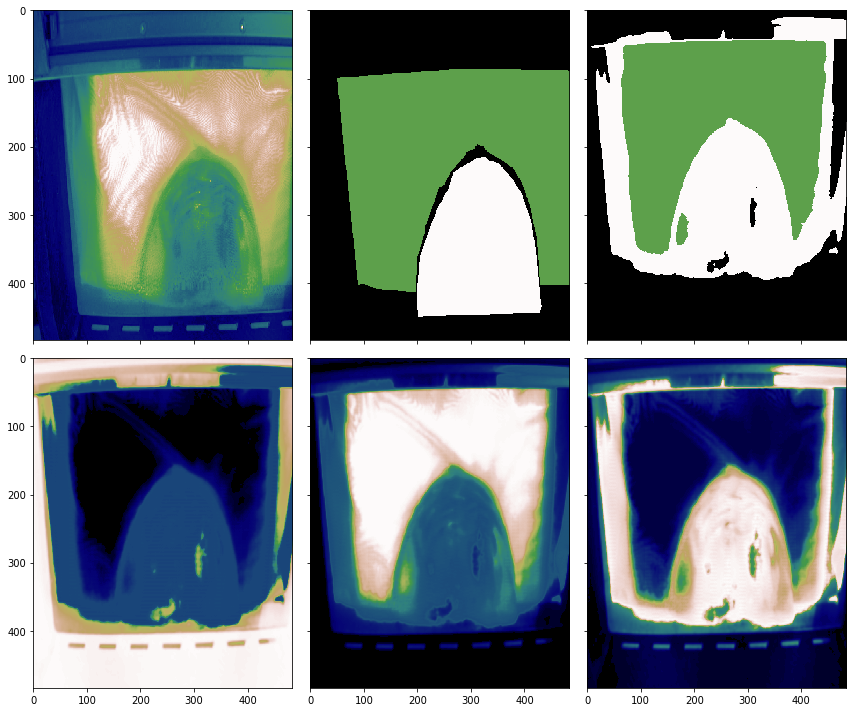

In [6]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 10))
ax[0,0].imshow(x_test[0, :, :, 0], aspect="auto")
pred = np.argmax(prediction, axis=3)
label_ = np.argmax(y_test, axis=3)
# segmentation res
ax[0,1].imshow(label_[0, :, :], aspect="auto")
ax[0,2].imshow(pred[0, :, :], aspect="auto")

# activation of separate class
ax[1,0].imshow(prediction[0, :, :, 0], aspect="auto")
ax[1,1].imshow(prediction[0, :, :, 1], aspect="auto")
ax[1,2].imshow(prediction[0, :, :, 2], aspect="auto")
# pred = np.int8(np.rint(pred))
ax[0,2].imshow(pred[0, :, :], aspect="auto")
# ax[2].imshow(prediction[0, :, :, 2], aspect="auto")

# ax[3].imshow(prediction[0,...,1] > 0.07, aspect="auto")
# ax[4].imshow(prediction[0,...,1] > 0.075, aspect="auto")
# ax[5].imshow(prediction[0,...,1] > 0.08, aspect="auto")
fig.tight_layout()
plt.show()

In [18]:
print(prediction[0, :, :, 1])
print(np.min(prediction[0, :, :, 0]))
print(np.max(prediction[0, :, :, 0]))

print(np.min(prediction[0, :, :, 1]))
print(np.max(prediction[0, :, :, 1]))

print(np.min(prediction[0, :, :, 2]))
print(np.max(prediction[0, :, :, 2]))
print('')
print(prediction[0, 150, 250, 0])
print(prediction[0, 150, 250, 1])
print(prediction[0, 150, 250, 2])
print('')
print(prediction[0, 250, 150, 0])
print(prediction[0, 250, 150, 1])
print(prediction[0, 250, 150, 2])

[[0.01008501 0.01384646 0.01760416 ... 0.33506155 0.33452266 0.33487108]
 [0.00971865 0.01343947 0.01619639 ... 0.33333334 0.3390784  0.33333334]
 [0.00882725 0.01114963 0.01378712 ... 0.3378853  0.33751872 0.33850217]
 ...
 [0.00082445 0.00088157 0.00081869 ... 0.00070938 0.00066654 0.00071093]
 [0.00077982 0.00081107 0.00078181 ... 0.00065716 0.00063453 0.00066825]
 [0.00081374 0.00087488 0.00082843 ... 0.00070698 0.00065898 0.00070188]]
4.6885936e-05
0.9990049
0.0004976191
0.9999063
4.6885936e-05
0.33333334

0.008289145
0.9834216
0.008289145

0.0005304018
0.9989392
0.0005304018


In [16]:
print(np.amax(pred), np.amin(pred))
print(np.amax(label_), np.amin(label_))
print(label_.shape)

1 0
2 0
(1, 572, 572)


In [7]:
# Speed test
import time
x_test, y_test = generator_test_reallife(1)
t0 = time.time()
prediction = net_real.predict("./unet_trained/model.ckpt", x_test)
print('Time elapsed for single frame prediction: ', time.time()-t0, ' s')

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-01-17 14:02:24,362 Restoring parameters from ./unet_trained/model.ckpt


2019-01-17 14:02:24,409 Model restored from file: ./unet_trained/model.ckpt


Time elapsed for single frame prediction:  0.3763997554779053  s
